# Get the data

Get the data processed in the previous notebook (Exploratory Data Analysis)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from src.constants import X_TRAIN_PATH, X_TEST_PATH, Y_TRAIN_PATH, Y_TEST_PATH

# save the processed data to their corresponding files
X_train = pd.read_csv(filepath_or_buffer=X_TRAIN_PATH, sep=',')
X_test = pd.read_csv(filepath_or_buffer=X_TEST_PATH, sep=',')

y_train = pd.read_csv(filepath_or_buffer=Y_TRAIN_PATH, sep=',')
y_test = pd.read_csv(filepath_or_buffer=Y_TEST_PATH, sep=',')

In [3]:
# verify x_train
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,84,0,0,0,0.0,0.304,21
1,9,112,82,24,0,28.2,1.282,50
2,1,139,46,19,83,28.7,0.654,22
3,0,161,50,0,0,21.9,0.254,65
4,6,134,80,37,370,46.2,0.238,46


In [4]:
# verify x_test
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,98,58,33,190,34.0,0.430,43
1,2,112,75,32,0,35.7,0.148,21
2,2,108,64,0,0,30.8,0.158,21
3,8,107,80,0,0,24.6,0.856,34
4,7,136,90,0,0,29.9,0.210,50


In [5]:
# verify y_train
y_train.head()

,Outcome
0,0
1,1
2,0
3,0
4,1


In [6]:
# verify y_test
y_test.head()

,Outcome
0,0
1,0
2,0
3,0
4,0


# Option 1. Default model

## Step 1: Initialization and training of the model

In [7]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
print(f"Hyperparameters of the default model: {model.get_params()}")

Hyperparameters of the default model: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


[Text(0.4602238581730769, 0.9642857142857143, 'Glucose <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]\nclass = 0'),
 Text(0.1650390625, 0.8928571428571429, 'Age <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]\nclass = 0'),
 Text(0.31263146033653844, 0.9285714285714286, 'True  '),
 Text(0.06009615384615385, 0.8214285714285714, 'BMI <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]\nclass = 0'),
 Text(0.019230769230769232, 0.75, 'DiabetesPedigreeFunction <= 0.672\ngini = 0.016\nsamples = 124\nvalue = [123, 1]\nclass = 0'),
 Text(0.009615384615384616, 0.6785714285714286, 'gini = 0.0\nsamples = 108\nvalue = [108, 0]\nclass = 0'),
 Text(0.028846153846153848, 0.6785714285714286, 'DiabetesPedigreeFunction <= 0.686\ngini = 0.117\nsamples = 16\nvalue = [15, 1]\nclass = 0'),
 Text(0.019230769230769232, 0.6071428571428571, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.038461538461538464, 0.6071428571428571, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]\ncla

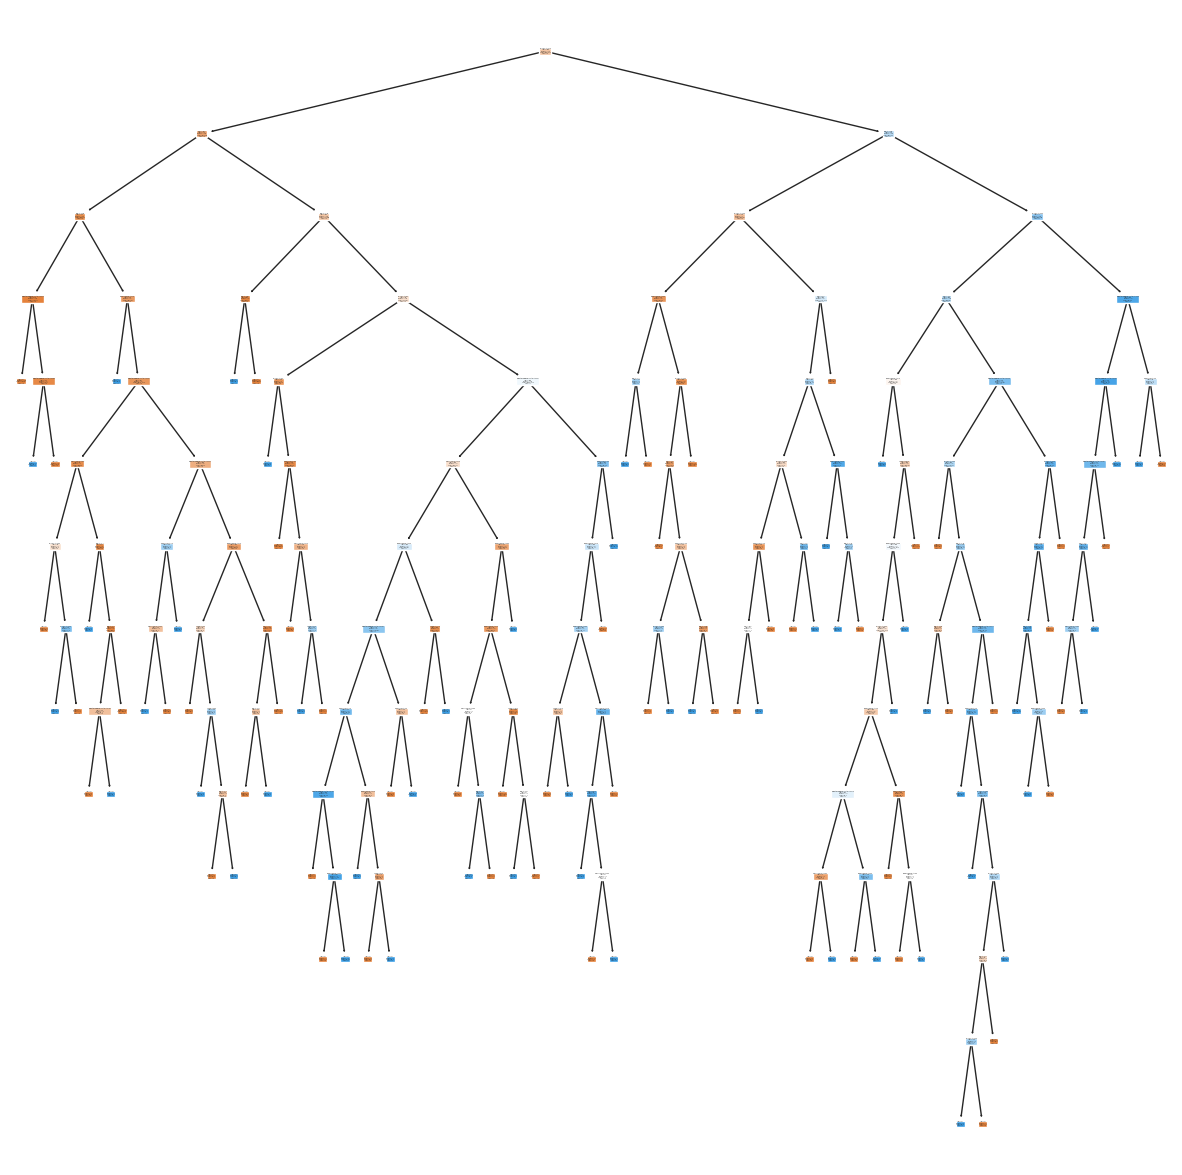

In [9]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

## Step 2: Model prediction

In [10]:
# make the prediction
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [11]:
# make the prediction of the probabilities of being one class or another
y_prob = model.predict_proba(X_test)

## Step 3: Metrics

Let's print the full report of the model

In [12]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix,
                            log_loss, classification_report)

default_model_accuracy = accuracy_score(y_test, y_pred)
default_model_precision = precision_score(y_test, y_pred)
default_model_recall = recall_score(y_test, y_pred)
default_model_f1 = f1_score(y_test, y_pred)
default_model_auc_roc = roc_auc_score(y_test, y_prob[:, 1])
default_model_log_loss = log_loss(y_test, y_prob)
default_model_confusion = confusion_matrix(y_test, y_pred)
default_model_report = classification_report(y_test, y_pred)

print(f'Accuracy: {default_model_accuracy}')
print(f'Precision: {default_model_precision}')
print(f'Recall: {default_model_recall}')
print(f'F1-Score: {default_model_f1}')
print(f'AUC-ROC: {default_model_auc_roc}')
print(f'Confusion Matrix:\n{default_model_confusion}')
print(f'Log Loss: {default_model_log_loss}')
print(f'Classification Report:\n{default_model_report}')

Accuracy: 0.7467532467532467
Precision: 0.625
Recall: 0.7272727272727273
F1-Score: 0.6722689075630253
AUC-ROC: 0.7424242424242424
Confusion Matrix:
[[75 24]
 [15 40]]
Log Loss: 9.127938195945253
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



Here the analysis.

Now let's draw the confusion matrix

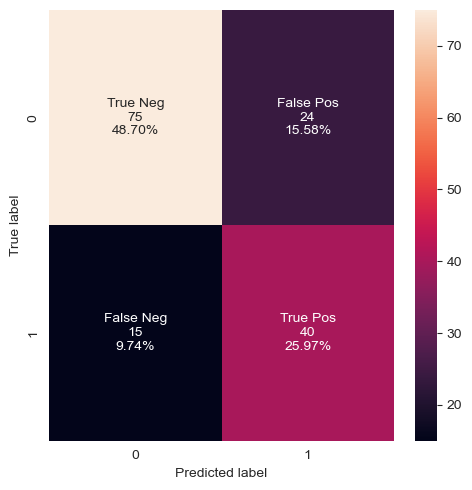

In [13]:
from src.utils import draw_confusion_matrix

draw_confusion_matrix(confusion=default_model_confusion)

The interpretation of a confusion matrix is as follows:

- **True positive (TP)**: corresponds to the number 40 and are the cases where the model predicted positive **(the person has diabetes)** and the actual class is also positive.
- **True negative (TN)**: Corresponds to the number 75 and are the cases where the model predicted negative **(the person does not have diabetes)** and the actual class is also negative.
- **False positive (FP)**: Corresponds to the number 24 and are the cases in which the model predicted positive, but the actual class is negative.
- **False negative (FN)**: Corresponds to the number 15 and are the cases where the model predicted negative, but the actual class is positive.

# Option 2. Model with optimization

In [14]:
# create another model
opt_model = DecisionTreeClassifier(random_state=42)

## Step 1: Create the hyperparameter optimization model

In [15]:
from sklearn.model_selection import GridSearchCV

# define the parameters that we want to adjust by hand, depends on the model to use
hyperparams = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, None],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': [2, 3, 4 , 5, 10, 15, 20, None],
    'class_weight': [None, 'balanced']
}

# initialize the grid
grid = GridSearchCV(opt_model, hyperparams, scoring = 'accuracy', cv = 5, n_jobs=-1, verbose=1)

## Step 2: Fit the model

In [16]:
grid.fit(X_train, y_train.values)

print(f"Best hyperparameters: {grid.best_params_}")

Fitting 5 folds for each of 28800 candidates, totalling 144000 fits
Best hyperparameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'max_leaf_nodes': 15, 'min_samples_leaf': 5, 'min_samples_split': 2}


## Step 3: Get the best model and predict

In [17]:
# get the best parameters and model
best_params = grid.best_params_
best_model: DecisionTreeClassifier = grid.best_estimator_

[Text(0.5, 0.9375, 'Glucose <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]\nclass = 0'),
 Text(0.25, 0.8125, 'Age <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]\nclass = 0'),
 Text(0.375, 0.875, 'True  '),
 Text(0.125, 0.6875, 'BMI <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]\nclass = 0'),
 Text(0.0625, 0.5625, 'gini = 0.016\nsamples = 124\nvalue = [123, 1]\nclass = 0'),
 Text(0.1875, 0.5625, 'gini = 0.275\nsamples = 97\nvalue = [81, 16]\nclass = 0'),
 Text(0.375, 0.6875, 'BMI <= 26.35\ngini = 0.454\nsamples = 169\nvalue = [110, 59]\nclass = 0'),
 Text(0.3125, 0.5625, 'gini = 0.057\nsamples = 34\nvalue = [33, 1]\nclass = 0'),
 Text(0.4375, 0.5625, 'Glucose <= 94.5\ngini = 0.49\nsamples = 135\nvalue = [77, 58]\nclass = 0'),
 Text(0.375, 0.4375, 'gini = 0.225\nsamples = 31\nvalue = [27, 4]\nclass = 0'),
 Text(0.5, 0.4375, 'DiabetesPedigreeFunction <= 0.521\ngini = 0.499\nsamples = 104\nvalue = [50.0, 54.0]\nclass = 1'),
 Text(0.4375, 0.3125, 'SkinThickness

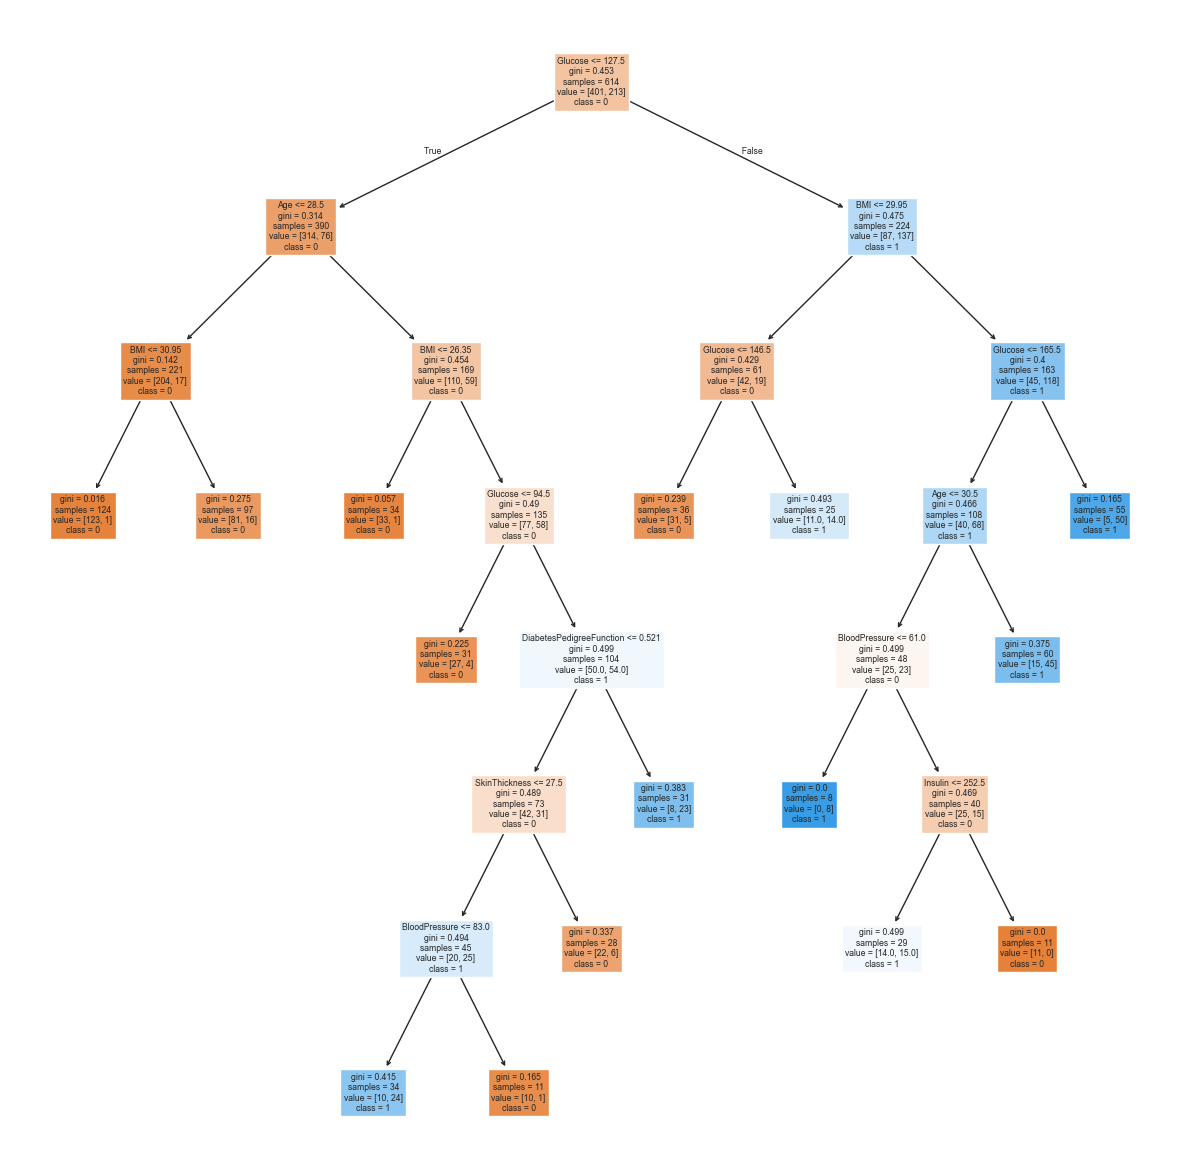

In [18]:
plt.figure(figsize=(15,15))

tree.plot_tree(best_model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

In [19]:
# predict the values
y_pred = best_model.predict(X_test)

In [20]:
# make the prediction of the probabilities of being one class or another
y_prob = best_model.predict_proba(X_test)

## Step 4: Metrics of the model

In [21]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix,
                            log_loss, classification_report)

optimized_model_accuracy = accuracy_score(y_test, y_pred)
optimized_model_precision = precision_score(y_test, y_pred)
optimized_model_recall = recall_score(y_test, y_pred)
optimized_model_f1 = f1_score(y_test, y_pred)
optimized_model_auc_roc = roc_auc_score(y_test, y_prob[:, 1])
optimized_model_log_loss = log_loss(y_test, y_prob)
optimized_model_confusion = confusion_matrix(y_test, y_pred)
optimized_model_report = classification_report(y_test, y_pred)

print(f'Accuracy: {optimized_model_accuracy}')
print(f'Precision: {optimized_model_precision}')
print(f'Recall: {optimized_model_recall}')
print(f'F1-Score: {optimized_model_f1}')
print(f'AUC-ROC: {optimized_model_auc_roc}')
print(f'Confusion Matrix:\n{optimized_model_confusion}')
print(f'Log Loss: {optimized_model_log_loss}')
print(f'Classification Report:\n{optimized_model_report}')

Accuracy: 0.7402597402597403
Precision: 0.6086956521739131
Recall: 0.7636363636363637
F1-Score: 0.6774193548387096
AUC-ROC: 0.823048668503214
Confusion Matrix:
[[72 27]
 [13 42]]
Log Loss: 0.5212031656888974
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.73      0.78        99
           1       0.61      0.76      0.68        55

    accuracy                           0.74       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.76      0.74      0.75       154



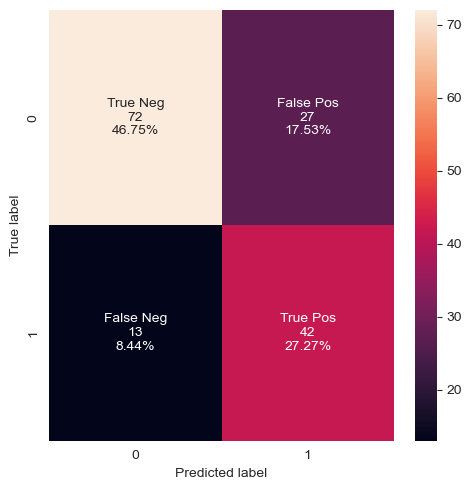

In [22]:
draw_confusion_matrix(confusion=optimized_model_confusion)

The interpretation of a confusion matrix is as follows:

- **True positive (TP)**: corresponds to the number 42 and are the cases where the model predicted positive **(the person has diabetes)** and the actual class is also positive.
- **True negative (TN)**: Corresponds to the number 72 and are the cases where the model predicted negative **(the person does not have diabetes)** and the actual class is also negative.
- **False positive (FP)**: Corresponds to the number 27 and are the cases in which the model predicted positive, but the actual class is negative.
- **False negative (FN)**: Corresponds to the number 13 and are the cases where the model predicted negative, but the actual class is positive.

# Conclusion

In [23]:

from src.utils import show_comparison_table

# set the metrics to use
metrics: list[str] = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']

# get the metrics of the default and optimized list values
default_model_metrics: list[float] = [default_model_accuracy, default_model_precision, default_model_recall, default_model_f1, default_model_auc_roc]
optimized_model_metrics: list[float] = [optimized_model_accuracy, optimized_model_precision, optimized_model_recall, optimized_model_f1, optimized_model_auc_roc]

# construct the Markdown table
show_comparison_table(
    metric_names=metrics,
    default_metrics=default_model_metrics,
    optimized_metrics=optimized_model_metrics,
)

| Metric | Default Model | Optimized Model |
|---|---|---|
| Accuracy | 0.75 | 0.74 |
| Precision | 0.62 | 0.61 |
| Recall | 0.73 | 0.76 |
| F1-Score | 0.67 | 0.68 |
| AUC-ROC | 0.74 | 0.82 |


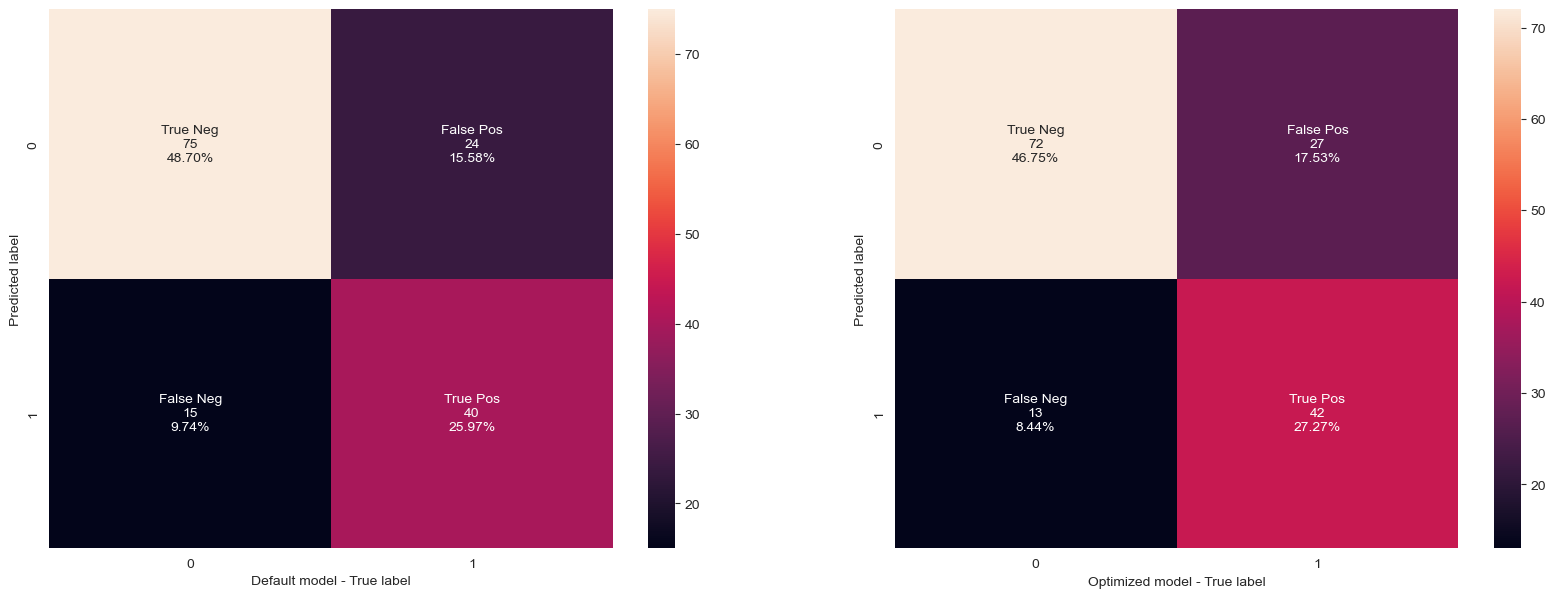

<Figure size 1000x500 with 0 Axes>

In [24]:
from src.utils import draw_comparison_confusion_matrices

draw_comparison_confusion_matrices(confusion_1=default_model_confusion, confusion_2=optimized_model_confusion, confusion_matrix_1_name='Default model', confusion_matrix_2_name='Optimized model')

WE can see that the default model and the optimized one are really close, the metrics are not too differents, one model has a better performance with the negative label 0 (do not have diabetes) and other model have better results with the positive label 1 (have diabetes).

The default model has a better performance with the label 1, it has better accuracy and precision. While the optimized model has a better performance with the label 0 and these results are backed up by the metrics, because the optimized model has better recall, f1-score and AUC-ROC.